## importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,precision_score, recall_score
from sklearn.metrics import roc_auc_score,roc_curve
    
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')

## Step 1 : Problem Statement

In [ ]:
# Target column = "Class"(Binary Classification)

## Step 2: Data Gathering

In [2]:
df = pd.read_csv(r"C:\Users\sanskriti\S.python\Project ML\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Step 3: EDA 

In [3]:
 df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df["Class"].unique()

array([0, 1], dtype=int64)

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: >

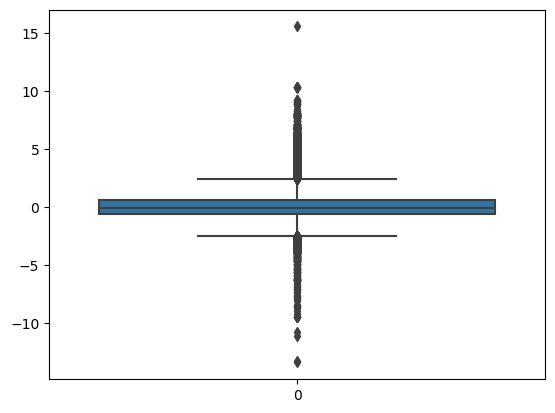

In [8]:
# Finding ouliers by boxplot
sns.boxplot(df["V9"]) 

In [9]:
# Finding ouliers by function

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75) 
IQR = Q3 - Q1

lower_tail = Q1 - 1.5 * IQR
upper_tail = Q3 + 1.5 * IQR

ouliers = (df < lower_tail) | (df > upper_tail)
ouliers_count = ouliers.sum()
print(ouliers_count)

Time          0
V1         7062
V2        13526
V3         3363
V4        11148
V5        12295
V6        22965
V7         8948
V8        24134
V9         8283
V10        9496
V11         780
V12       15348
V13        3368
V14       14149
V15        2894
V16        8184
V17        7420
V18        7533
V19       10205
V20       27770
V21       14497
V22        1317
V23       18541
V24        4774
V25        5367
V26        5596
V27       39163
V28       30342
Amount    31904
Class       492
dtype: int64


## Step 4 : Feature Engineering

In [10]:
def Finding_outlier1(df_tel,columns):
    for column in columns:
            q1 = df_tel[column].quantile(0.25)
            q3 = df_tel[column].quantile(0.75)
            iqr = q3 - q1

            lower_tail1 = q1 - 1.5 * iqr
            upper_tail1 = q3 + 1.5 * iqr
            print(lower_tail1)
            print(upper_tail1)
            
            df_tel[column] = df_tel[column].apply(lambda x : upper_tail1 if x > upper_tail1 else (lower_tail1 if x < lower_tail1 else x))
columns = ["Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20",
           "V21","V22","V23","V24","V25","V26","V27","V28","Amount"]

Finding_outlier1(df,columns)

-73477.0
266999.0
-4.274396001792603
4.669664311280146
-2.7019605905224315
2.90713454829761
-3.7667054090861836
3.9035361133965982
-3.236612225031064
3.1313133981683787
-2.646882336821933
2.5672117056694685
-2.51858636568538
2.148855653580996
-2.240843806907704
2.2572040007487804
-1.0125931529838397
1.1313092708678223
-2.503452471089882
2.457493931105559
-2.0194494839425694
1.9379472025887527
-3.015625599764853
2.9927248115734812
-1.941285763020238
2.1539523105259604
-2.6151056869463822
2.629071347271788
-1.803659804964707
1.8712356417278626
-2.430441907369377
2.496378434529079
-1.955036385495261
2.010295931257707
-1.8088832582431966
1.7248099271865331
-1.9983346169934264
2.0002915652156013
-1.8291713305051371
1.8318217675233686
-0.7288646731770594
0.6501841494971068
-0.8505531720141558
0.8085354286142143
-2.148706384652634
2.1349096473259586
-0.6260789583212862
0.6118746771624517
-1.5457552412760254
1.630695705034713
-1.318935979464254
1.3525064882663698
-1.178888075273932
1.092856323

<Axes: xlabel='Class', ylabel='count'>

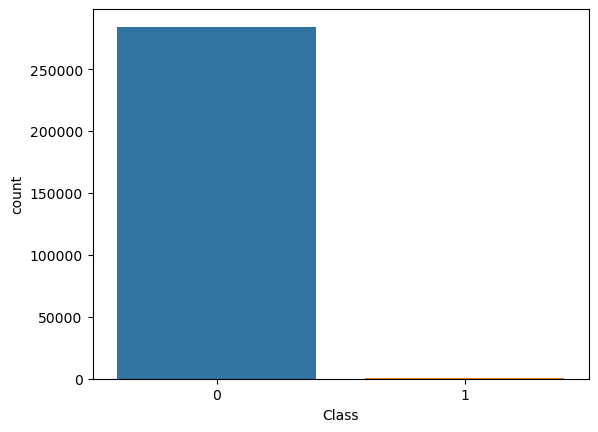

In [11]:
sns.countplot(x= df["Class"])

In [12]:
not_fraud=df[df.Class==0]
fraud=df[df.Class==1]

In [13]:
print(not_fraud.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


### Under sampling
Build a sample dataset containing similar amount of not_fraud and fraud data

In [14]:
not_fraud_sample=not_fraud.sample(n=492)

In [15]:
df1=pd.concat([not_fraud_sample,fraud],axis=0)
df1


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
83681,59977.0,-3.282335,-2.117187,-0.873167,-0.766377,-1.237326,-1.039772,0.351306,0.662028,-1.410136,...,-0.116916,-0.535939,-0.066407,0.403592,-0.601086,0.792244,0.333872,-0.249819,184.5125,0
141164,84157.0,-1.107151,-0.090664,2.082746,-1.482806,-0.639135,0.249247,0.435419,0.314824,0.661059,...,-0.020528,-0.000353,0.105374,0.261613,-0.558133,0.562289,-0.056149,0.132444,118.0800,0
197765,132166.0,2.151171,-0.967932,-0.895783,-0.873024,-0.809069,-0.577912,-0.801124,-0.122161,-0.003650,...,0.202043,0.550832,0.190048,0.747458,-0.134764,-0.213647,-0.015307,-0.042120,33.5000,0
108760,71055.0,0.793495,-0.763241,-0.114428,0.128738,-0.531125,-0.412490,0.266793,-0.054591,0.068443,...,0.128665,0.019102,-0.227440,0.321028,0.322389,1.092856,-0.125694,0.016765,184.5125,0
48845,43810.0,1.018868,-1.734784,0.453932,-1.140577,-1.898616,-0.808323,-0.697103,-0.280948,-1.876394,...,-0.208957,-0.785017,-0.049492,0.372131,0.063475,-0.439492,0.000310,0.075043,184.5125,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-3.766705,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.611875,-0.294885,0.537503,0.788395,0.292680,0.147968,184.5125,1
280143,169347.0,1.378559,1.289381,-3.766705,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.333872,0.186637,0.7600,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.131309,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.333872,0.194361,77.8900,1
281144,169966.0,-3.113832,0.585864,-3.766705,1.817092,-0.840618,-2.518586,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.333872,-0.249819,184.5125,1


In [16]:
df1["Class"].value_counts()


0    492
1    492
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

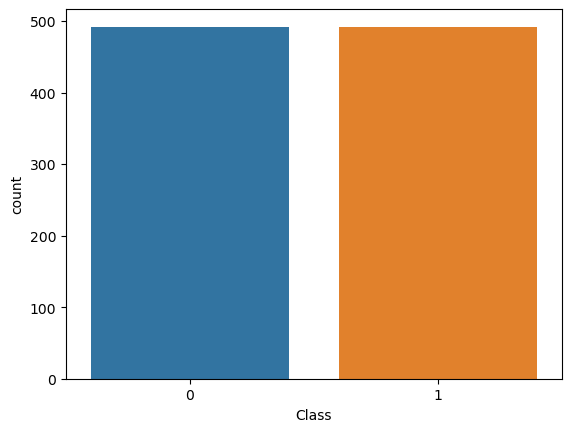

In [17]:
sns.countplot(x= df1["Class"])

### Step 5 : Feature Selection

### Assumption 1.Linearity 

In [18]:
#pearson's coeff of correalation R = -1 to +1
df1.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.234622,-0.195523,-0.067902,-0.240621,0.297999,0.124978,0.188350,-0.124760,0.134567,...,-0.053121,0.153619,0.131280,-0.004892,-0.237768,-0.051892,-0.128234,-0.052477,0.002741,-0.177108
V1,0.234622,1.000000,-0.510431,0.472981,-0.439541,0.476825,0.314832,0.486766,-0.281575,0.449785,...,-0.324930,-0.064475,0.012506,-0.049053,0.038713,-0.008301,-0.068607,-0.003450,-0.143566,-0.520870
V2,-0.195523,-0.510431,1.000000,-0.583482,0.575175,-0.327059,-0.398373,-0.493718,0.304655,-0.527116,...,0.264399,-0.028879,-0.026977,-0.040113,0.098610,0.082529,0.199834,0.190851,-0.282120,0.586854
V3,-0.067902,0.472981,-0.583482,1.000000,-0.616946,0.357486,0.480311,0.561064,-0.320820,0.584867,...,-0.400474,-0.003326,0.009074,0.084308,-0.044316,-0.054933,-0.277595,-0.178425,-0.083083,-0.719401
V4,-0.240621,-0.439541,0.575175,-0.616946,1.000000,-0.309778,-0.387210,-0.500210,0.246642,-0.515015,...,0.333949,-0.018158,-0.023904,-0.043667,0.098609,0.067382,0.274038,0.188908,0.018866,0.763762
V5,0.297999,0.476825,-0.327059,0.357486,-0.309778,1.000000,0.180564,0.548447,-0.323295,0.349367,...,-0.306427,-0.084983,-0.120857,-0.092545,0.043288,-0.014795,-0.031463,0.021893,-0.318492,-0.340069
V6,0.124978,0.314832,-0.398373,0.480311,-0.387210,0.180564,1.000000,0.347663,-0.304321,0.415254,...,-0.323249,0.130177,0.231991,-0.098530,-0.103571,-0.040546,-0.206962,-0.164575,0.112895,-0.426375
V7,0.188350,0.486766,-0.493718,0.561064,-0.500210,0.548447,0.347663,1.000000,-0.443004,0.455184,...,-0.383470,-0.045690,-0.013652,0.086497,-0.006442,-0.089256,-0.287741,-0.128614,0.096281,-0.562803
V8,-0.124760,-0.281575,0.304655,-0.320820,0.246642,-0.323295,-0.304321,-0.443004,1.000000,-0.377613,...,0.509167,-0.043291,-0.099242,-0.042185,0.081345,0.149923,0.262380,0.107437,0.027477,0.237607
V9,0.134567,0.449785,-0.527116,0.584867,-0.515015,0.349367,0.415254,0.455184,-0.377613,1.000000,...,-0.308584,-0.076172,0.099679,0.062930,-0.094447,-0.146141,-0.272575,-0.145863,-0.036016,-0.557280


In [19]:
plt.figure(figsize=(100,100))
sns.heatmap(df1.corr(),annot= True)

<Axes: >

In [20]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std_array = std.fit_transform(df.iloc[:,:30])
df2 = pd.DataFrame(std_array)
df2

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.996583,-0.900025,-0.109510,1.831035,1.072714,-0.311553,0.551750,0.266800,0.062045,0.372361,...,0.879686,-0.009783,0.390173,-0.396454,0.109061,0.253172,-0.395678,0.731878,-0.259015,1.587299
1,-1.996583,0.699998,0.192551,0.101661,0.363145,0.058235,0.008411,-0.101221,0.034047,-0.235690,...,-0.128700,-0.650218,-0.905468,0.396825,-0.575401,0.331544,0.277835,-0.130956,0.028789,-0.795094
2,-1.996562,-0.899113,-1.239020,1.274147,0.310977,-0.464612,1.886400,0.904662,0.368831,-1.472222,...,1.740422,0.812274,1.088302,2.309528,-1.163379,-0.672290,-0.288735,-0.411641,-0.570321,2.153063
3,-1.996562,-0.653258,-0.209723,1.288584,-0.637457,-0.007051,1.334535,0.264500,0.636043,-1.346893,...,-0.565898,-0.287585,0.004858,-0.695567,-1.981645,1.305745,-0.465837,0.303095,0.404729,1.163777
4,-1.996541,-0.773627,0.737606,1.110328,0.328719,-0.375489,0.186232,0.675205,-0.698302,0.818132,...,1.374071,0.017616,1.125905,-0.497539,0.234148,-0.425533,1.082601,1.251629,1.641107,0.296140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-2.727619,2.546237,-2.768520,-1.555595,-2.454646,-2.421513,-2.600186,2.188475,1.895054,...,2.134358,0.705640,0.155541,2.309528,-0.860615,2.736255,0.543255,1.944418,2.123658,-0.826226
284803,1.641952,-0.506852,-0.093735,1.465207,-0.542312,0.808517,1.146236,0.017984,0.466015,0.589391,...,0.276231,0.707959,1.304176,0.064078,-1.713515,-1.238266,-0.836421,0.337899,-0.520249,-0.436754
284804,1.641974,1.156308,-0.313128,-2.391199,-0.404396,2.385724,2.233855,-0.353220,1.317624,0.439791,...,0.093051,0.763028,0.814827,-0.123091,1.073569,0.531524,-0.178141,-0.049613,-0.303321,0.261928
284805,1.641974,-0.198125,0.428128,0.492821,0.547515,-0.348352,0.712653,-0.803249,1.257346,0.400151,...,0.489608,0.865513,1.128407,-0.594338,0.203756,-1.162260,1.177481,0.582136,0.751240,-0.676566


In [21]:
df3=df1.drop("Class",axis=1)
df3

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
83681,59977.0,-3.282335,-2.117187,-0.873167,-0.766377,-1.237326,-1.039772,0.351306,0.662028,-1.410136,...,0.086237,-0.116916,-0.535939,-0.066407,0.403592,-0.601086,0.792244,0.333872,-0.249819,184.5125
141164,84157.0,-1.107151,-0.090664,2.082746,-1.482806,-0.639135,0.249247,0.435419,0.314824,0.661059,...,-0.274391,-0.020528,-0.000353,0.105374,0.261613,-0.558133,0.562289,-0.056149,0.132444,118.0800
197765,132166.0,2.151171,-0.967932,-0.895783,-0.873024,-0.809069,-0.577912,-0.801124,-0.122161,-0.003650,...,0.013293,0.202043,0.550832,0.190048,0.747458,-0.134764,-0.213647,-0.015307,-0.042120,33.5000
108760,71055.0,0.793495,-0.763241,-0.114428,0.128738,-0.531125,-0.412490,0.266793,-0.054591,0.068443,...,0.290670,0.128665,0.019102,-0.227440,0.321028,0.322389,1.092856,-0.125694,0.016765,184.5125
48845,43810.0,1.018868,-1.734784,0.453932,-1.140577,-1.898616,-0.808323,-0.697103,-0.280948,-1.876394,...,0.231935,-0.208957,-0.785017,-0.049492,0.372131,0.063475,-0.439492,0.000310,0.075043,184.5125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-3.766705,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.650184,0.778584,-0.319189,0.611875,-0.294885,0.537503,0.788395,0.292680,0.147968,184.5125
280143,169347.0,1.378559,1.289381,-3.766705,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.333872,0.186637,0.7600
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.131309,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.333872,0.194361,77.8900
281144,169966.0,-3.113832,0.585864,-3.766705,1.817092,-0.840618,-2.518586,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.333872,-0.249819,184.5125


### Assumption 2.No multicolinearity

In [22]:
vif = []
for i in range(df2.shape[1]):
    vif_cal = variance_inflation_factor(df2.to_numpy(),i)
    vif.append(vif_cal)
print(vif)

[1.9149892983761596, 1.5959496239159654, 2.3103681062337125, 1.9101126121796157, 1.277688703626413, 1.7631759753985032, 1.45634689373574, 2.1810498089921326, 1.5370274257981442, 1.2955120435207725, 1.736101515516973, 1.3568411594083445, 1.8103812154918788, 1.0506097353126513, 1.5877456392288123, 1.0977416304687955, 1.6455239608240648, 2.2612007988589116, 1.3092548220465052, 1.098037818281985, 1.4854295332416179, 1.5899434420477057, 1.4644468102152157, 1.3846159838393446, 1.0330618715911044, 1.3104120397602494, 1.026592536607326, 1.3854820589839114, 1.4382964385885129, 2.6918437367486554]


In [23]:
df_VIF = pd.DataFrame()
df_VIF['Columns'] = df2.columns
df_VIF

,Columns
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [24]:
df_VIF["VIF"]= vif
df_VIF 

,Columns,VIF
0,0,1.914989
1,1,1.595950
2,2,2.310368
3,3,1.910113
4,4,1.277689
5,5,1.763176
6,6,1.456347
7,7,2.181050
8,8,1.537027
9,9,1.295512


In [25]:
df_VIF = pd.DataFrame()
df_VIF['Columns'] = df2.columns
df_VIF

,Columns
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [26]:
x = df3
y = df1["Class"]
print(x.shape)
print(y.shape)

(984, 30)
(984,)


### train_test_split

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10,stratify=y) #stratify : equal proportion of classes

## Step 6 : model training

### 1.Logistic Regression

In [28]:
reg1 = LogisticRegression()  
reg1

LogisticRegression()

In [29]:
reg_model1 = reg1.fit(xtrain,ytrain)
reg_model1

LogisticRegression()

In [30]:
ytrain_pred = reg_model1.predict(xtrain)
ytrain_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,

In [31]:
#training
accuracy = accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy : {accuracy}")
print(50*"_")
print(50*"*")

multi_confusion_matrix = confusion_matrix(ytrain,ytrain_pred)
print(multi_confusion_matrix)
print(50*"_")
print(50*"*")

class_report = classification_report(ytrain,ytrain_pred)
print(class_report)
print(50*"_")
print(50*"*")

Accuracy : 0.9142441860465116
__________________________________________________
**************************************************
[[326  18]
 [ 41 303]]
__________________________________________________
**************************************************
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       344
           1       0.94      0.88      0.91       344

    accuracy                           0.91       688
   macro avg       0.92      0.91      0.91       688
weighted avg       0.92      0.91      0.91       688

__________________________________________________
**************************************************


In [32]:
ytest_pred =reg_model1.predict(xtest)
ytest_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [33]:
#testing
accuracy = accuracy_score(ytest,ytest_pred)
print(f"Accuracy : {accuracy}")
print(50*"_")
print(50*"*")

multi_conf_matrix = confusion_matrix(ytest,ytest_pred)
print(multi_conf_matrix)
print(50*"_")
print(50*"*")

print(classification_report(ytest,ytest_pred))
print(50*"_")
print(50*"*")

Accuracy : 0.9087837837837838
__________________________________________________
**************************************************
[[137  11]
 [ 16 132]]
__________________________________________________
**************************************************
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       148
           1       0.92      0.89      0.91       148

    accuracy                           0.91       296
   macro avg       0.91      0.91      0.91       296
weighted avg       0.91      0.91      0.91       296

__________________________________________________
**************************************************


### 2.Decision Tree 

#### Model training

In [34]:
dec_tree = DecisionTreeClassifier()
dec_tree_model = dec_tree.fit(xtrain,ytrain)
dec_tree_model

DecisionTreeClassifier()

### Training

In [35]:
ytrain_pred = dec_tree_model.predict(xtrain)
ytrain_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,

In [36]:
accuracy_training = accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy = {accuracy_training}")

Training_classification_report = classification_report(ytrain,ytrain_pred)
print(f"classification_report = {Training_classification_report}")

Training_confusion_matrix = confusion_matrix(ytrain,ytrain_pred)
print(f"confusion_matrix = {Training_confusion_matrix}")

Accuracy = 1.0
classification_report =               precision    recall  f1-score   support

           0       1.00      1.00      1.00       344
           1       1.00      1.00      1.00       344

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688

confusion_matrix = [[344   0]
 [  0 344]]


### Testing

In [37]:
ytest_pred = dec_tree_model.predict(xtest)

In [38]:
accuracy_testing = accuracy_score(ytest,ytest_pred)
print(f"Accuracy = {accuracy_testing}")

Testing_classification_report = classification_report(ytest,ytest_pred)
print(f"classification_report = {Testing_classification_report}")

Testing_confusion_matrix = confusion_matrix(ytest,ytest_pred)
print(f"confusion_matrix = {Testing_confusion_matrix}")

Accuracy = 0.8952702702702703
classification_report =               precision    recall  f1-score   support

           0       0.93      0.86      0.89       148
           1       0.87      0.93      0.90       148

    accuracy                           0.90       296
   macro avg       0.90      0.90      0.90       296
weighted avg       0.90      0.90      0.90       296

confusion_matrix = [[127  21]
 [ 10 138]]


### Decision Tree Hyperparameter Tunning

In [39]:
Hyper_Decision = {
    "criterion" : ["entropy","gini"],
    "max_depth" : np.arange(2,10),
    "min_samples_split" : np.arange(2,20),
    "min_samples_leaf" : np.arange(2,20),
} 

In [40]:
Random_search = RandomizedSearchCV(dec_tree_model,Hyper_Decision, cv = 5)

In [41]:
Random_search.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [42]:
Random_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=14,
                       min_samples_split=5)

In [43]:
Decision_hyper_model = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=17,
                       min_samples_split=15)

In [44]:
Decision_hyper_model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=17,
                       min_samples_split=15)

In [45]:
ytrain_pred_hyper = Decision_hyper_model.predict(xtrain)
ytrain_pred_hyper

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,

### Training

In [46]:
accuracy_Training_hyper = accuracy_score(ytrain,ytrain_pred_hyper)
print(f"Accuracy = {accuracy_Training_hyper}")

Training_classification_report_hyper = classification_report(ytrain,ytrain_pred_hyper)
print(f"classification_report = {Training_classification_report_hyper}")

Training_confusion_matrix_hyper = confusion_matrix(ytrain,ytrain_pred_hyper)
print(f"confusion_matrix = {Training_confusion_matrix_hyper}")

Accuracy = 0.940406976744186
classification_report =               precision    recall  f1-score   support

           0       0.92      0.97      0.94       344
           1       0.97      0.91      0.94       344

    accuracy                           0.94       688
   macro avg       0.94      0.94      0.94       688
weighted avg       0.94      0.94      0.94       688

confusion_matrix = [[334  10]
 [ 31 313]]


### Testing

In [47]:
ytest_pred_hyper = Decision_hyper_model.predict(xtest)

In [48]:
accuracy_Testing_hyper = accuracy_score(ytest,ytest_pred_hyper)
print(f"Accuracy = {accuracy_Testing_hyper}")

Testing_classification_hyper = classification_report(ytest,ytest_pred_hyper)
print(f"classification_report = {Testing_classification_hyper}")

Testing_confusion__hyper = confusion_matrix(ytest,ytest_pred_hyper)
print(f"confusion_matrix = {Testing_confusion__hyper}")

Accuracy = 0.9290540540540541
classification_report =               precision    recall  f1-score   support

           0       0.92      0.95      0.93       148
           1       0.94      0.91      0.93       148

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296

confusion_matrix = [[140   8]
 [ 13 135]]


# Ensemble Methods:- Bagging and Boosting

In [49]:
Random_tel=RandomForestClassifier()
Random_tel

RandomForestClassifier()

In [50]:
Random_tel_cls = Random_tel.fit(xtrain,ytrain)
Random_tel_cls

RandomForestClassifier()

In [51]:
ytrain_pred_forest = Random_tel_cls.predict(xtrain)
ytrain_pred_forest

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,

### Training

In [52]:
Random_accuracy = accuracy_score(ytrain,ytrain_pred_forest)
print(f"Accuracy = {Random_accuracy}")

Random_Training_classification = classification_report(ytrain,ytrain_pred_forest)
print(f"classification_report = {Random_Training_classification}")

Random_Training_confusion = confusion_matrix(ytrain,ytrain_pred_forest)
print(f"confusion_matrix = {Random_Training_confusion}")

Accuracy = 1.0
classification_report =               precision    recall  f1-score   support

           0       1.00      1.00      1.00       344
           1       1.00      1.00      1.00       344

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688

confusion_matrix = [[344   0]
 [  0 344]]


### Testing

In [53]:
ytest_pred_forest = Random_tel_cls.predict(xtest)

In [54]:
Random_Testing_accuracy = accuracy_score(ytest,ytest_pred_forest)
print(f"Accuracy = {Random_Testing_accuracy}")

Random_Testing_classification = classification_report(ytest,ytest_pred_forest)
print(f"classification_report = {Random_Testing_classification}")

Random_Testing_confusion = confusion_matrix(ytest,ytest_pred_forest)
print(f"confusion_matrix = {Random_Testing_confusion}")

Accuracy = 0.9425675675675675
classification_report =               precision    recall  f1-score   support

           0       0.93      0.95      0.94       148
           1       0.95      0.93      0.94       148

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296

confusion_matrix = [[141   7]
 [ 10 138]]


## Random Forest Hyperparameter Tunning

In [55]:
Hyper_Random = {
    "n_estimators": [100],
    "criterion": ['gini', 'entropy'],
    "max_depth":np.array([2,10]), 
    "min_samples_split":np.array([2,10]),
    "min_samples_leaf": np.array([2,10]),
    "max_features" : ["auto"]
     }

In [56]:
Random_model = RandomForestClassifier(random_state=10)

In [57]:
RandomSearch =RandomizedSearchCV(Random_model,Hyper_Random,cv=6)

In [58]:
RandomSearch.fit(xtrain,ytrain)

RandomizedSearchCV(cv=6, estimator=RandomForestClassifier(random_state=10),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2, 10]),
                                        'max_features': ['auto'],
                                        'min_samples_leaf': array([ 2, 10]),
                                        'min_samples_split': array([ 2, 10]),
                                        'n_estimators': [100]})

In [59]:
RandomSearch.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_leaf=2, random_state=10)

In [60]:
Forest_hyper_model = RandomForestClassifier(criterion='entropy', max_depth=10, max_features='auto',min_samples_leaf=2, random_state=10)

In [61]:
Forest_hyper_model.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_leaf=2, random_state=10)

In [62]:
ytrain_pred_hyper_forest = Forest_hyper_model.predict(xtrain)
ytrain_pred_hyper_forest

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,

### Training

In [63]:
Training_forest_accuracy = accuracy_score(ytrain,ytrain_pred_hyper_forest)
print(f"Accuracy = {Training_forest_accuracy}")

Training_classification_forest_hyper = classification_report(ytrain,ytrain_pred_hyper_forest)
print(f"classification_report = {Training_classification_forest_hyper}")

Training_confusion_forest_hyper = confusion_matrix(ytrain,ytrain_pred_hyper_forest)
print(f"confusion_matrix = {Training_confusion_forest_hyper}")

Accuracy = 0.9956395348837209
classification_report =               precision    recall  f1-score   support

           0       0.99      1.00      1.00       344
           1       1.00      0.99      1.00       344

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688

confusion_matrix = [[343   1]
 [  2 342]]


### Testing

In [64]:
ytest_pred_hyper_forest = Forest_hyper_model.predict(xtest)

In [65]:
Testing_forest_accuracy = accuracy_score(ytest,ytest_pred_hyper_forest)
print(f"Accuracy = {Testing_forest_accuracy}")

Testing_classification__forest_hyper = classification_report(ytest,ytest_pred_hyper_forest)
print(f"classification_report = {Testing_classification__forest_hyper}")

Testing_confusion_forest_hyper = confusion_matrix(ytest,ytest_pred_hyper_forest)
print(f"confusion_matrix = {Testing_confusion_forest_hyper}")

Accuracy = 0.9527027027027027
classification_report =               precision    recall  f1-score   support

           0       0.94      0.97      0.95       148
           1       0.97      0.93      0.95       148

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

confusion_matrix = [[144   4]
 [ 10 138]]


# Creating pickle

In [76]:
with open("Credit.pkl","wb") as f:
    pickle.dump(Random_tel,f)

In [77]:
class prediction():
    def credit(self,testing_data):
        with open("Credit.pkl","rb") as f:
            model = pickle.load(f)
            prediction=model.predict(testing_data)
            print('prediction=',prediction)
        return prediction

In [78]:
predict=prediction()

In [79]:
testing_data=x.head(8)

In [80]:
predict.credit(testing_data)

prediction= [0 0 0 0 0 0 0 0]


array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)